In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Data and Visualization

In [17]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


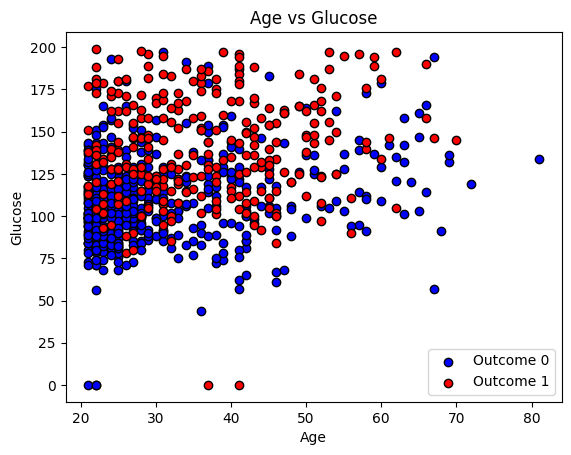

In [18]:
plt.scatter(data[data['Outcome'] == 0]['Age'], 
            data[data['Outcome'] == 0]['Glucose'], 
            color='blue', label='Outcome 0', edgecolors='k')

plt.scatter(data[data['Outcome'] == 1]['Age'], 
            data[data['Outcome'] == 1]['Glucose'], 
            color='red', label='Outcome 1', edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Age vs Glucose")
plt.legend()
plt.show()

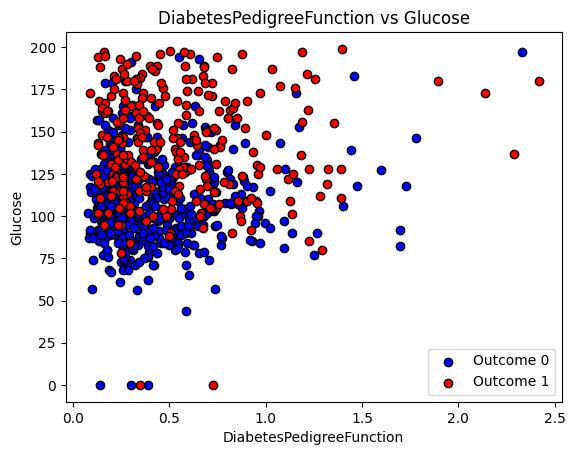

In [19]:
plt.scatter(data[data['Outcome'] == 0]['DiabetesPedigreeFunction'], 
            data[data['Outcome'] == 0]['Glucose'], 
            color='blue', label='Outcome 0', edgecolors='k')

plt.scatter(data[data['Outcome'] == 1]['DiabetesPedigreeFunction'], 
            data[data['Outcome'] == 1]['Glucose'], 
            color='red', label='Outcome 1', edgecolors='k')
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Glucose")
plt.title("DiabetesPedigreeFunction vs Glucose")
plt.legend()
plt.show()

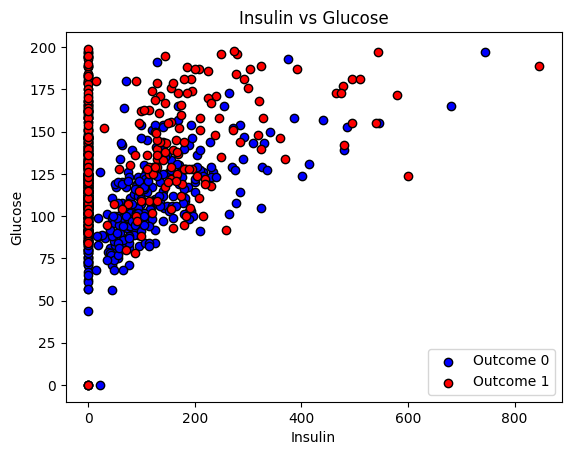

In [20]:
plt.scatter(data[data['Outcome'] == 0]['Insulin'], 
            data[data['Outcome'] == 0]['Glucose'], 
            color='blue', label='Outcome 0', edgecolors='k')

plt.scatter(data[data['Outcome'] == 1]['Insulin'], 
            data[data['Outcome'] == 1]['Glucose'], 
            color='red', label='Outcome 1', edgecolors='k')
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.title("Insulin vs Glucose")
plt.legend()
plt.show()

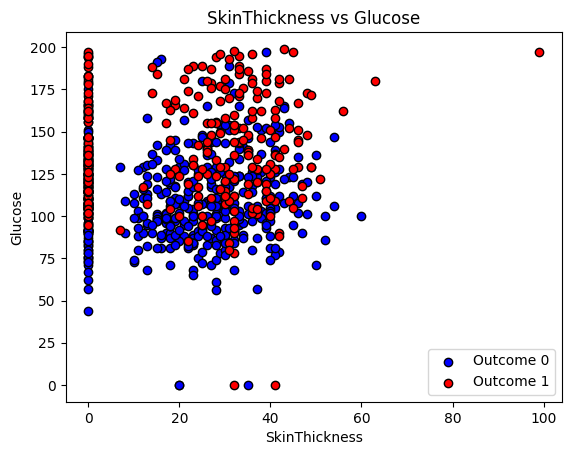

In [21]:
plt.scatter(data[data['Outcome'] == 0]['SkinThickness'], 
            data[data['Outcome'] == 0]['Glucose'], 
            color='blue', label='Outcome 0', edgecolors='k')

plt.scatter(data[data['Outcome'] == 1]['SkinThickness'], 
            data[data['Outcome'] == 1]['Glucose'], 
            color='red', label='Outcome 1', edgecolors='k')
plt.xlabel("SkinThickness")
plt.ylabel("Glucose")
plt.title("SkinThickness vs Glucose")
plt.legend()
plt.show()

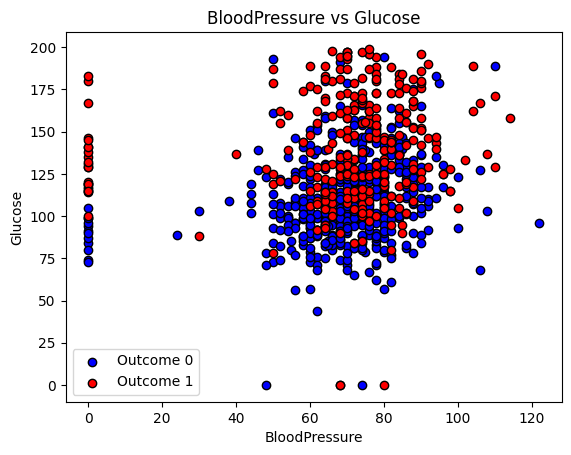

In [22]:
plt.scatter(data[data['Outcome'] == 0]['BloodPressure'], 
            data[data['Outcome'] == 0]['Glucose'], 
            color='blue', label='Outcome 0', edgecolors='k')

plt.scatter(data[data['Outcome'] == 1]['BloodPressure'], 
            data[data['Outcome'] == 1]['Glucose'], 
            color='red', label='Outcome 1', edgecolors='k')
plt.xlabel("BloodPressure")
plt.ylabel("Glucose")
plt.title("BloodPressure vs Glucose")
plt.legend()
plt.show()

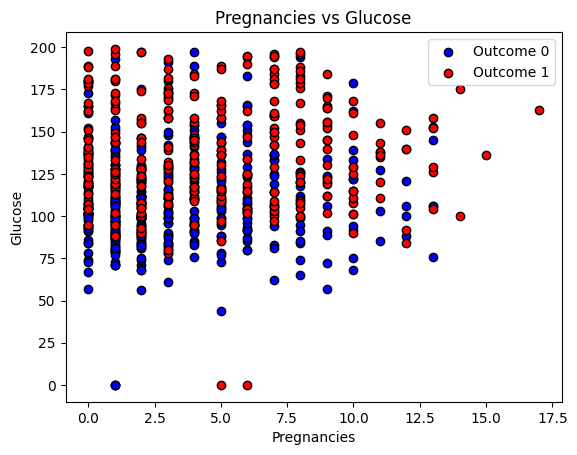

In [23]:
plt.scatter(data[data['Outcome'] == 0]['Pregnancies'], 
            data[data['Outcome'] == 0]['Glucose'], 
            color='blue', label='Outcome 0', edgecolors='k')

plt.scatter(data[data['Outcome'] == 1]['Pregnancies'], 
            data[data['Outcome'] == 1]['Glucose'], 
            color='red', label='Outcome 1', edgecolors='k')
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.title("Pregnancies vs Glucose")
plt.legend()
plt.show()

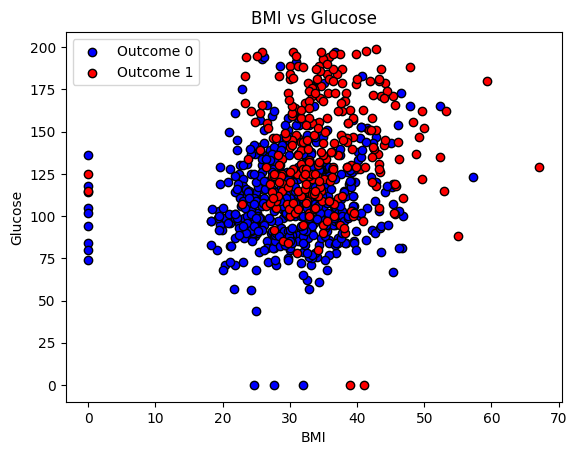

In [24]:
plt.scatter(data[data['Outcome'] == 0]['BMI'], 
            data[data['Outcome'] == 0]['Glucose'], 
            color='blue', label='Outcome 0', edgecolors='k')

plt.scatter(data[data['Outcome'] == 1]['BMI'], 
            data[data['Outcome'] == 1]['Glucose'], 
            color='red', label='Outcome 1', edgecolors='k')
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("BMI vs Glucose")
plt.legend()
plt.show()

Data Preprocessing

In [25]:
X = data.drop(columns=['Outcome'], axis=1)
X = X.values.T
y = data['Outcome'].values.reshape(1, -1)

In [26]:
# Data Normalization
X = (X - X.mean(axis=1, keepdims=True)) / X.std(axis=1, keepdims=True)

Model Architecture

In [27]:
# Defining activation functions and their derivative
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    """ReLU activation function."""
    return np.maximum(0, z)

def relu_derivative(z):
    """Derivative of the ReLU function."""
    return np.where(z > 0, 1, 0)

def binary_cross_entropy(y_true, y_pred):
    """Binary cross-entropy loss function."""
    epsilon = 1e-8  # To prevent log(0) errors
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


In [28]:
# Defining the Neural Network class
class NeuralNetwork():
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        """Initialize the neural network with given sizes for input, hidden, and output layers."""
        self.params = self.initialize_parameters(input_size, hidden1_size, hidden2_size, output_size)

    def initialize_parameters(self, input_size, hidden1_size, hidden2_size, output_size):
        """Randomly initialize weights and biases."""
        np.random.seed(42)  # So that training results do not change at every run
        params = {
            'W1': np.random.randn(hidden1_size, input_size) * 0.01,  # Small random weights
            'b1': np.zeros((hidden1_size, 1)),  # Bias initialized to zero
            'W2': np.random.randn(hidden2_size, hidden1_size) * 0.01,
            'b2': np.zeros((hidden2_size, 1)),
            'W3': np.random.randn(output_size, hidden2_size) * 0.01,
            'b3': np.zeros((output_size, 1))
        }
        return params
    
    def forward_propagation(self, X):
        """Perform forward propagation through the network."""
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        W3, b3 = self.params['W3'], self.params['b3']
        
        # Layer 1 (Input to Hidden 1)
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        
        # Layer 2 (Hidden 1 to Hidden 2)
        Z2 = np.dot(W2, A1) + b2
        A2 = relu(Z2)
        
        # Layer 3 (Hidden 2 to Output)
        Z3 = np.dot(W3, A2) + b3
        A3 = sigmoid(Z3)  # Output using sigmoid
        
        # Cache intermediate values for backpropagation
        cache = (Z1, A1, Z2, A2, Z3, A3)
        return A3, cache
    
    def backward_propagation(self, X, y, cache):
        """Perform backward propagation to compute gradients."""
        W2, W3 = self.params['W2'], self.params['W3']
        Z1, A1, Z2, A2, Z3, A3 = cache
        m = X.shape[1]  # Number of training examples
        
        # Output layer gradients
        dZ3 = A3 - y
        dW3 = (1/m) * np.dot(dZ3, A2.T)
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
        
        # Hidden layer 2 gradients
        dA2 = np.dot(W3.T, dZ3)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        
        # Hidden layer 1 gradients
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        # Store gradients
        grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2, 'dW3': dW3, 'db3': db3}
        return grads
    
    def update_parameters(self, grads, learning_rate):
        self.params['W1'] -= learning_rate * grads['dW1']
        self.params['b1'] -= learning_rate * grads['db1']
        self.params['W2'] -= learning_rate * grads['dW2']
        self.params['b2'] -= learning_rate * grads['db2']
        self.params['W3'] -= learning_rate * grads['dW3']
        self.params['b3'] -= learning_rate * grads['db3']
        return self.params
    
    def train(self, X, y, epochs, learning_rate):
        """Train the neural network using gradient descent."""
        costs = []
        for epoch in range(epochs):
            # Forward propagation
            A3, cache = self.forward_propagation(X)
            
            # Compute cost
            cost = binary_cross_entropy(y, A3)
            costs.append(cost)
            
            # Backward propagation
            grads = self.backward_propagation(X, y, cache)
            
            # Update parameters
            self.update_parameters(grads, learning_rate)
            
            # Print cost every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Cost: {cost}')
        
        return costs
    
    def predict(self, X):
        """Predict outcomes for the given input."""
        A3, _ = self.forward_propagation(X)
        return (A3 > 0.5).astype(int)

Training the model

Epoch 0, Cost: 0.6931477663651332
Epoch 100, Cost: 0.6751641483790828
Epoch 200, Cost: 0.6642420015506385
Epoch 300, Cost: 0.6575780077445575
Epoch 400, Cost: 0.6534898247358177
Epoch 500, Cost: 0.6509683552575546
Epoch 600, Cost: 0.6494056293594631
Epoch 700, Cost: 0.6484330290197826
Epoch 800, Cost: 0.6478255618200263
Epoch 900, Cost: 0.6474450338906124


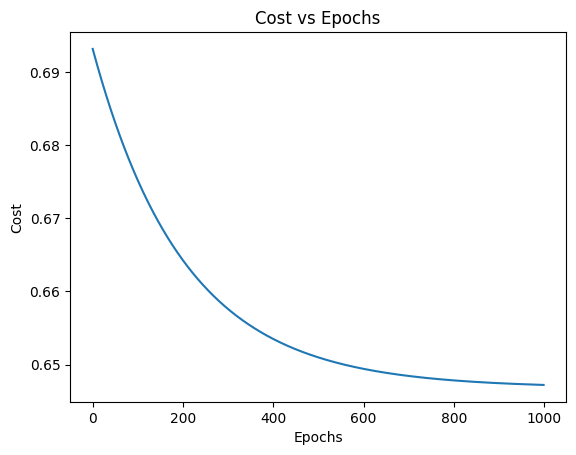

In [29]:
# Create neural network instance
nn = NeuralNetwork(input_size=8, hidden1_size=6, hidden2_size=4, output_size=1)

# Train the model
costs = nn.train(X, y, epochs=1000, learning_rate=0.01)

# Plot cost over epochs
plt.plot(range(1000), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.show()